<a href="https://colab.research.google.com/github/Sudecon5/Projects_New-/blob/main/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [11]:
import pandas as pd
import numpy as np
import sklearn as sk

In [14]:
#Load and Read Data
data_df = pd.read_csv('/content/Power Plant Data.csv')
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [15]:
# Define X and Y values
x=data_df.drop(['PE'],axis=1).values
y=data_df['PE'].values

In [16]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [17]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [18]:
#Split into Data and Test Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
#Train The Model on Training set and test set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
# Predict the test set results
y_pred=regressor.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [24]:
regressor.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

# Evaluate the Model

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9304112159477683

# Plot the Results

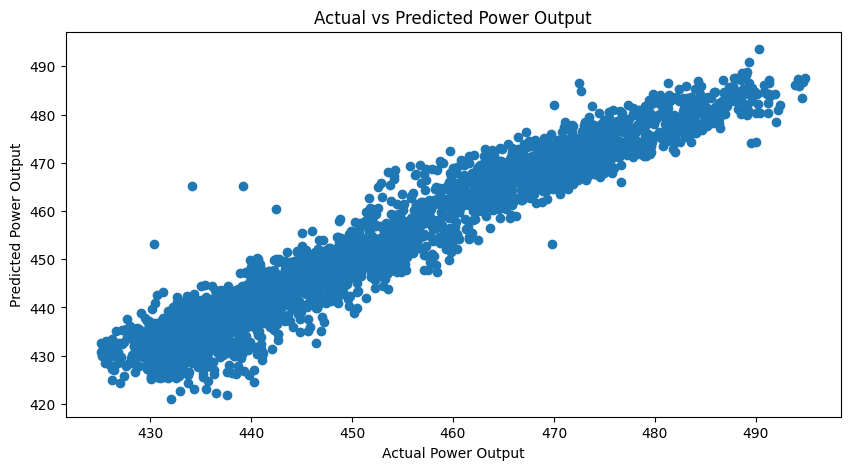

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Power Output')
plt.ylabel('Predicted Power Output')
plt.title('Actual vs Predicted Power Output')
plt.show()

In [28]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Value,Predicted Value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
...,...,...,...
2866,475.86,472.027234,3.832766
2867,477.94,474.005522,3.934478
2868,426.86,432.473808,-5.613808
2869,433.40,436.164172,-2.764172
